#Online Retail

###Reconhecimentos:
Este conjunto de dados foi consultado no repositório UCI ML: https://archive.ics.uci.edu/ml/datasets/online+retail

###Descrição:
Uma empresa que vende parte do produto e você deseja saber quão bem está o desempenho de venda do produto. Você tem os dados que podemos analisar, mas que tipo de análise podemos fazer? Bem, podemos segmentar os clientes com base no seu comportamento de compra no mercado. Tenha em mente que os dados são realmente enormes e não podemos analisá-los a olho nu. Usaremos algoritmos de aprendizado de máquina e o poder da computação para isso.


Este é um conjunto de dados transnacionais que contém todas as transações ocorridas entre 12/01/2010 e 12/09/2011 para um varejo on-line sem loja registrado e com sede no Reino Unido.


###Objetivo:
Entenda o conjunto de dados e a limpeza (se necessário) e fazer uma análise descritiva.
Construa modelos de cluster para segmentar a similaridade baseada no cliente.
Também ajuste os hiperparâmetros e compare as métricas de avaliação de vários algoritmos de classificação.


###Grupo

Ingrid Guimarães

Lucas Cruz

Mohara Nascimento

Marianna Rossi

Jaisson Italo

#Plano de Ação:

Nosso objetivo é resolver a definição do problema criando um plano de ação. Aqui estão algumas das etapas necessárias:

1. Exploração de dados

2. Tratamento da base

3. Manipulação dos dados

4. Análise Exploratória de Dados (EDA)

5. Agrupamento Hierárquico

6. K-means

7. DBSCAN

8. Resultados e conclusão do projeto

#1.  Exploração de dados





In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs
import time
from matplotlib import pyplot as plt

In [87]:
#Importando dados
df = pd.read_excel('/content/drive/MyDrive/Santander Coders/6 - Marchine lerning 2/Projeto ML2/Online Retail.xlsx')


In [88]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [89]:
df.shape

(541909, 8)

**Inferência**: O Datset consiste em 8 features e 541.909 amostras.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [91]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000




---


O conjunto de dados “Varejo Online” contém informações sobre transações de varejo online. Vejamos o significado de cada coluna do conjunto de dados:

#InvoiceNo:
- Identificador único para cada fatura ou transação de varejo.
- Auxilia no rastreamento e identificação de transações de vendas individuais.

#StockCode:
- Código ou identificador para o produto ou item específico vendido em cada transação.
- Permite a associação de produtos com suas respectivas transações.

#Descrição:
- Descrição textual ou nome do produto ou item sendo vendido.
- Fornece informações detalhadas sobre o produto.

#Quantidade:

- Representa a quantidade do produto ou item vendido em cada transação.
- Indica quantas unidades do produto foram adquiridas.

#InvoiceDate:
- Registra a data e hora de cada fatura ou transação de varejo.
- Fornece um carimbo de data/hora da venda.

#UnitPrice:
- Contém o preço por unidade do produto ou item vendido.
- Representa o custo de uma unidade do produto.

#CustomerID:
- Identificador exclusivo para cada cliente que fez uma compra.
- Permite o rastreamento de transações específicas do cliente.

#País:
- Nome ou código do país onde o cliente está localizado.
- Fornece informações geográficas sobre os clientes.

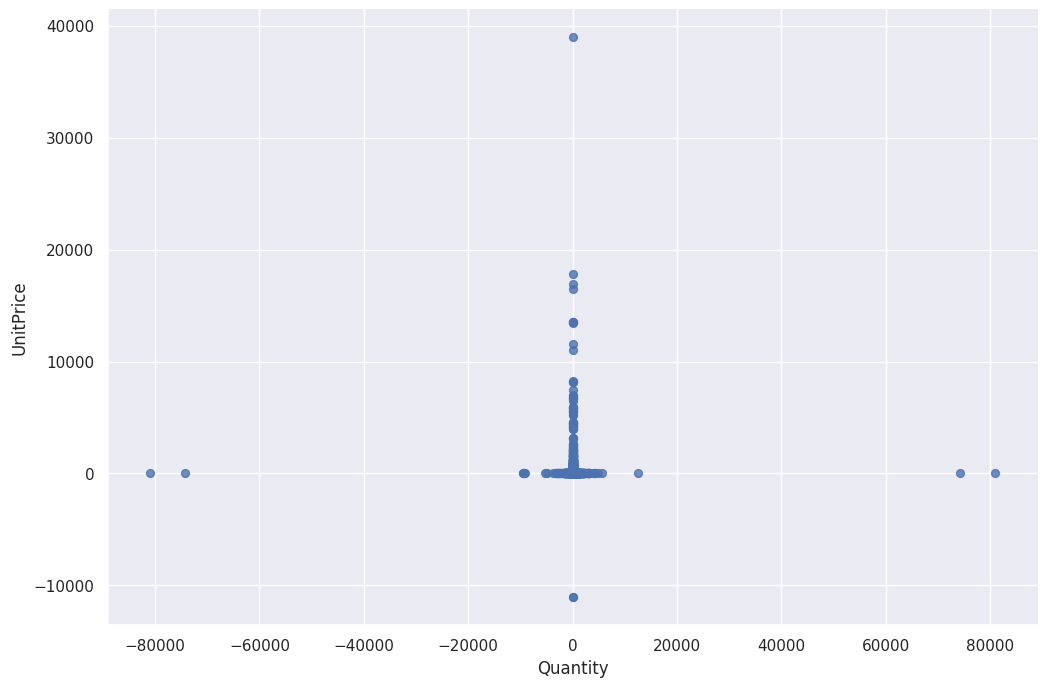

In [92]:
# Cria um gráfico de dispersão e os eixos x e y são definidos como 'Quantity' e 'UnitPrice', respectivamente.
df.plot(kind='scatter', x='Quantity', y='UnitPrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)



---

#2. Tratamento da base


Podemos observar que tem contem erros na base e números nulos. Para isso faremos alguns tratamentos.

- A fecture Quantity que representa a quantidade do produto em que está sendo vendido não faz sentido ele conter valores negativos. Então iremos dropar esses valores.

- A fature UnitPrice corresponde ao preço unitário do produto com isso também não faz sentido ele conter valores negativos.

- É percebido também que valores unitátios acima de 1000 não corresponde a produtos e sim ajustes.

- Numeros nulos na description e CustomerID.



In [96]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [97]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [98]:
df[df['UnitPrice']>1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
528788,580729,DOT,DOTCOM POSTAGE,1,2011-12-05 17:24:00,1172.10,NaN,United Kingdom
533491,581023,DOT,DOTCOM POSTAGE,1,2011-12-07 10:35:00,1861.46,NaN,United Kingdom
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom


In [99]:
#Filtra o DataFrame para incluir apenas linhas onde a quantidade ('Quantity') é maior ou igual a zero.
df = df[df['Quantity'] >= 0]

#Filtra novamente o DataFrame para incluir apenas linhas onde o preço unitário ('UnitPrice') é maior ou igual a zero.
df = df[df['UnitPrice'] >= 0]

#Filtra mais uma vez o DataFrame para incluir apenas linhas onde o preço unitário ('UnitPrice') é menor ou igual a 1000.
df = df[df['UnitPrice'] <= 1000]

In [100]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531229.000000,531229.000000,397903.000000
mean,10.656280,3.654826,15294.378256
std,156.838558,12.753683,1713.150743
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,988.000000,18287.000000


In [101]:
# Cálculo da contribuição percentual de valores faltantes no DF

df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.11
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.10
Country         0.00
dtype: float64

In [102]:
# Retirando as linhas com valores faltantes da base
df_na = df.dropna(subset=['CustomerID'])
df_na.shape

(397903, 8)

In [103]:
df_na.describe()

,Quantity,UnitPrice,CustomerID
count,397903.000000,397903.000000,397903.000000
mean,13.022458,2.988997,15294.378256
std,180.424950,6.994231,1713.150743
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,908.160000,18287.000000


## 2.2 Manipulação dos dados

Nesta etapa, realizamos manipulações nos dados para facilitar a aplicação de algoritmos de clusterização e aprofundar nossos estudos na base de dados.

- **Introdução da variável 'Amount':**
  Criamos a variável 'Amount', que representa o valor pago por cada produto em uma operação. Essa variável é obtida multiplicando as quantidades ('Quantity') pelos preços unitários ('UnitPrice').

- **Criação da variável 'Valor Total':**
  Posteriormente, criamos a variável 'Valor Total', que corresponde à soma da 'Amount' agrupada pelo cliente ('CustomerID').

- **Transformação da variável 'InvoiceDate' em 'Frequencia':**
  A variável 'InvoiceDate' é transformada em 'Frequencia', contando o número único de datas de faturas para cada cliente.

- **Introdução da variável 'Valor/Freq':**
  Adicionamos a variável 'Valor/Freq', representando a razão entre 'Valor Total' e 'Frequencia' para cada cliente.

Os DataFrames resultantes dessas operações estão consolidados no DataFrame 'df_uni'.



In [104]:
#Novo atributo que representa a quantia monerátia na operação 'Amount'
df_na['Amount'] = df_na['Quantity']*df_na['UnitPrice']
df_na.head()

<ipython-input-104-73d80b04ca4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['Amount'] = df_na['Quantity']*df_na['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [105]:
#Cria um novo DataFrame 'df_total' agrupando os dados por 'CustomerID' e calculando a soma da coluna 'Amount' para cada cliente.
df_total = pd.DataFrame(df_na.groupby('CustomerID')['Amount'].sum())
df_total = df_total.rename(columns={'Amount': 'Valor Total'})
df_total = df_total.reset_index()
df_total.head()

,CustomerID,Valor Total
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [106]:
#Cria um novo DataFrame 'df_freq' agrupando os dados por 'CustomerID' e contando o número único de datas de faturas ('InvoiceDate') para cada cliente.
df_freq = pd.DataFrame(df_na.groupby('CustomerID')['InvoiceDate'].nunique())
df_freq = df_freq.rename(columns={'InvoiceDate': 'Frequencia'})
df_freq = df_freq.reset_index()
df_freq.head()

,CustomerID,Frequencia
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [107]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4338 non-null   float64
 1   Valor Total  4338 non-null   float64
dtypes: float64(2)
memory usage: 67.9 KB


In [108]:
#Realiza uma operação de merge (junção) entre os DataFrames 'df_total' e 'df_freq' usando 'CustomerID' como chave de junção.
df_uni=pd.merge(df_total, df_freq)

df_uni['Valor/Freq']=df_uni['Valor Total']/df_uni['Frequencia']
df_uni

,CustomerID,Valor Total,Frequencia,Valor/Freq
0,12346.0,77183.60,1,77183.600000
1,12347.0,4310.00,7,615.714286
2,12348.0,1797.24,4,449.310000
3,12349.0,1757.55,1,1757.550000
4,12350.0,334.40,1,334.400000
...,...,...,...,...
4333,18280.0,180.60,1,180.600000
4334,18281.0,80.82,1,80.820000
4335,18282.0,178.05,2,89.025000
4336,18283.0,2094.88,16,130.930000


In [110]:
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4338 non-null   float64
 1   Valor Total  4338 non-null   float64
 2   Frequencia   4338 non-null   int64  
 3   Valor/Freq   4338 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 169.5 KB


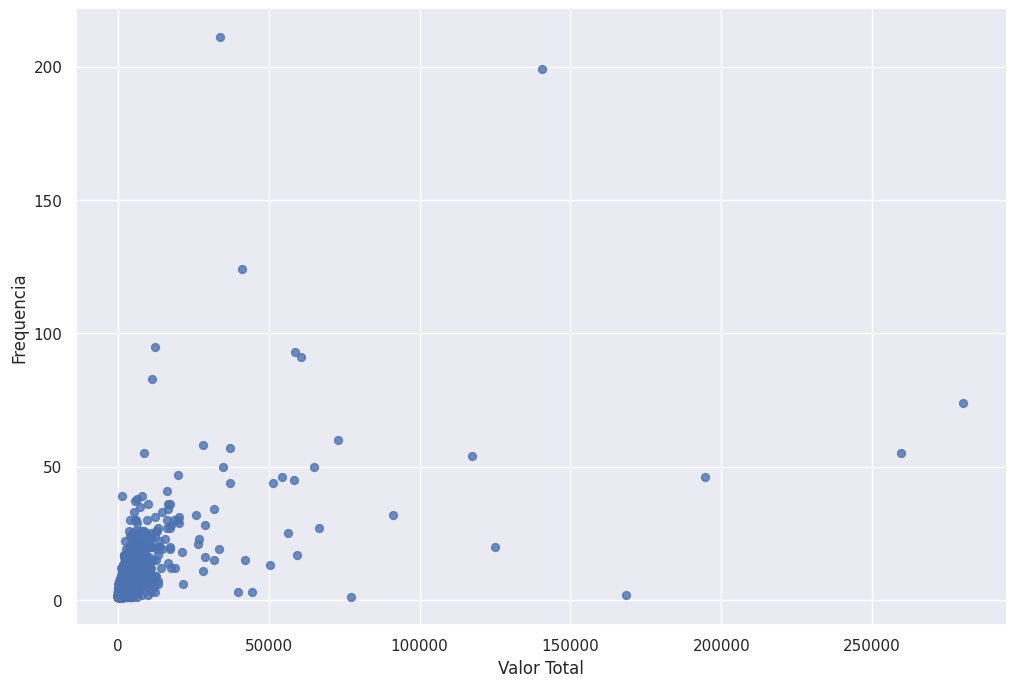

In [109]:
from matplotlib import pyplot as plt
df_uni.plot(kind='scatter', x='Valor Total', y='Frequencia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)